In [1]:
import polars as pl
import pandas as pd

In [2]:
df_train = pd.read_csv("../../Data/Train.csv")
df_test = pd.read_csv("../../Data/Test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384350 entries, 0 to 384349
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 384350 non-null  int64  
 1   text                       384350 non-null  object 
 2   source                     384350 non-null  object 
 3   prompt_id                  384350 non-null  int64  
 4   text_length                384350 non-null  int64  
 5   word_count                 384350 non-null  int64  
 6   label                      384350 non-null  int64  
 7   gpt-neo-125m-text_ppl      384350 non-null  float64
 8   gpt-neo-125m-max_sent_ppl  384350 non-null  float64
 9   gpt-neo-125m-sent_ppl_avg  384350 non-null  float64
 10  gpt-neo-125m-sent_ppl_std  384350 non-null  float64
 11  gpt-neo-125m-max_step_ppl  384350 non-null  float64
 12  gpt-neo-125m-step_ppl_avg  384350 non-null  float64
 13  gpt-neo-125m-step_ppl_std  38

In [4]:
df_train.source.value_counts()

source
Human                       169144
GPT-3.5                      25349
Text-Davinci-003             11234
Text-Davinci-002             10451
OPT-1.3B                      9010
                             ...  
Dolphin-Mixtral-8x7B           209
Toppy-M-7B                     205
LLaMA-2-7B                     194
Cohere-Command                 176
Dolphin-2.5-Mixtral-8x7B       110
Name: count, Length: 63, dtype: int64

In [5]:
x_train = df_train.drop(['Unnamed: 0','text', 'source', 'prompt_id', 'text_length', 'word_count', 'label','gpt2-large-text_ppl'
, 'gpt2-large-max_sent_ppl'
, 'gpt2-large-sent_ppl_avg'
, 'gpt2-large-sent_ppl_std'
, 'gpt2-large-max_step_ppl'
, 'gpt2-large-step_ppl_avg'
, 'gpt2-large-step_ppl_std'
, 'gpt2-large-rank_0'
, 'gpt2-large-rank_10'
, 'gpt2-large-rank_100'
, 'gpt2-large-rank_1000'], axis = 1)

y_train = df_train[['label']]

x_test = df_test.drop(['Unnamed: 0','text', 'source', 'prompt_id', 'text_length', 'word_count', 'label','gpt2-large-text_ppl'
, 'gpt2-large-max_sent_ppl'
, 'gpt2-large-sent_ppl_avg'
, 'gpt2-large-sent_ppl_std'
, 'gpt2-large-max_step_ppl'
, 'gpt2-large-step_ppl_avg'
, 'gpt2-large-step_ppl_std'
, 'gpt2-large-rank_0'
, 'gpt2-large-rank_10'
, 'gpt2-large-rank_100'
, 'gpt2-large-rank_1000'], axis = 1)

y_test = df_test[['label']]


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [8]:
xgb     = XGBClassifier()
lgb     = LGBMClassifier()
cat     = CatBoostClassifier()
rfr     = RandomForestClassifier()
clf     = VotingClassifier(
    n_jobs=-1,
    voting='soft',
    estimators=[('xgb', xgb), ('lgb', lgb), ('cat', cat), ('rfr', rfr)]
).fit(x_train, y_train)

/Users/t-andrew.widjaya/Documents/Thesis/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/t-andrew.widjaya/Documents/Thesis/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/t-andrew.widjaya/Documents/Thesis/.venv/lib/python3.9/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are us

[LightGBM] [Info] Number of positive: 215206, number of negative: 169144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 384350, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.559922 -> initscore=0.240845
[LightGBM] [Info] Start training from score 0.240845


In [9]:
y_pred = clf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      5000
           1       0.80      0.86      0.83      5000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



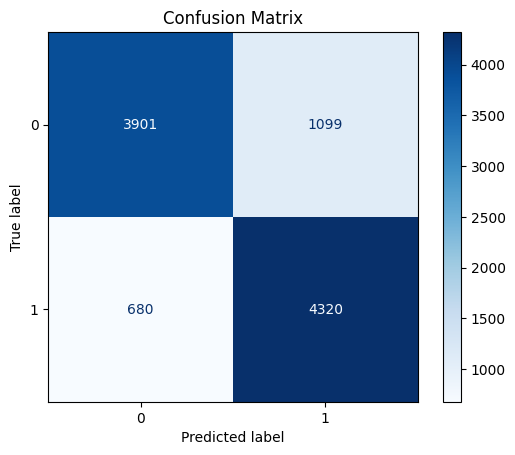

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")  # Use a color map for visualization
plt.title("Confusion Matrix")
plt.show() 